In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the dataset
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Describing the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
#Split the labels and the features
label_data = data['left']
features_data = data.drop(['left'], axis = 1)

In [6]:
#One hot encoding for categorical features
features_data_encoded = pd.get_dummies(features_data)

features_data_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [7]:
#Feature scaling is needed as we have different features on different scales
from sklearn import preprocessing

numerical = ['number_project', 'average_montly_hours', 'time_spend_company']

scaler = preprocessing.MinMaxScaler()
features_data_encoded[numerical] = scaler.fit_transform(features_data_encoded[numerical])

features_data_encoded.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,0.0,0.285047,0.125,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,0.6,0.775701,0.500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,1.0,0.822430,0.250,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,0.6,0.593458,0.375,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,0.0,0.294393,0.125,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [8]:
#Using SVM without any feature transformation

#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from time import time

#Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(features_data_encoded, label_data, test_size = 0.2, random_state = 42)
clf = svm.SVC()

#Fitting the data into classifier and measuring the time
start = time()
clf.fit(X_train, y_train)
end = time()
print("Training time: {:.2f}".format(end-start))

#Making predictions on testing data and measuring the time
start = time()
pred = clf.predict(X_test)
end = time()
print("Testing time: {:.2f}".format(end- start))

#Fetching accuracy
print("Accuracy: {:.2f}".format(accuracy_score(y_test, pred)))

Training time: 3.67
Testing time: 0.52
Accuracy: 0.82


In [9]:
#Getting pairwise correlation between the features
cov_matrix = features_data_encoded.corr()

In [10]:
#Eigen decomposition of covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

In [11]:
print('Eigenvectors \n%s' %eig_vectors)
print('\nEigenvalues \n%s' %eig_values)

Eigenvectors 
[[ -3.11175108e-02  -1.07095905e-01   2.96317832e-01   2.79102043e-01
    2.01930823e-02  -3.35238874e-02  -2.06124409e-01  -2.47076035e-01
   -1.76126405e-01  -2.56656901e-01   5.95365731e-01  -8.10497784e-02
   -3.52249166e-01   1.50512562e-01   6.93902110e-02  -3.15441638e-01
   -8.63806105e-02   1.89279862e-02   1.41908905e-15  -3.76877708e-16]
 [ -1.76092718e-01   4.71775413e-01  -3.15775370e-01  -7.01122251e-01
   -6.84218893e-02  -2.47540734e-02  -1.41053614e-02  -8.78288113e-02
   -1.01244764e-01  -9.75296772e-02   2.32149008e-01  -8.01559060e-02
   -1.44963047e-01   4.11479411e-02   3.67933620e-02  -1.76631012e-01
   -7.72788706e-02   2.47636715e-02   1.43675304e-15  -1.12558977e-16]
 [ -1.95820232e-01   5.42333013e-01   7.76287669e-01  -1.98574855e-02
   -5.61987489e-02   9.10015393e-03   1.08114472e-01   1.52786424e-01
    1.91729721e-02   1.21436689e-01  -6.78207631e-02   5.70241436e-03
    4.04507478e-02  -2.21377151e-02   7.73871452e-03   5.29173527e-02
    

In [12]:
total = sum(eig_values)
explained_var = [(i / total)*100 for i in sorted(eig_values, reverse=True)]

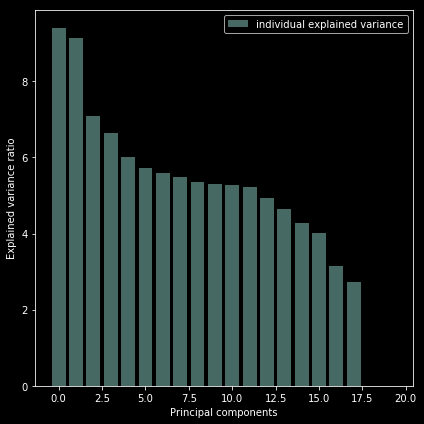

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 6))

    plt.bar(range(20), explained_var, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [14]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=12)

features_new = pca.fit_transform(features_data_encoded)

In [15]:
#Containing ndarrays into a dataframe
features_new = pd.DataFrame(features_new)

In [16]:
features_new.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.682889,0.765261,-0.097769,-0.148183,-0.068887,0.048978,-0.393554,0.006091,0.279045,0.038105,0.023927,-0.037838
1,0.743046,0.768016,-0.119604,-0.161454,-0.109401,0.080538,0.395560,0.029458,-0.249719,-0.036153,0.002319,0.032086
2,0.729671,0.757005,-0.139188,-0.239838,-0.139420,0.071524,0.794809,-0.032505,0.343428,0.045809,0.056468,-0.059328
3,-0.672930,0.754575,-0.111868,-0.150770,-0.081557,0.067140,0.285170,0.017253,-0.166732,-0.028759,-0.004628,0.016682
4,-0.683055,0.765287,-0.098045,-0.149238,-0.069013,0.048813,-0.388986,0.005187,0.288227,0.039193,0.024900,-0.039086


In [17]:
#Implementing SVC on our reduced features
X_train, X_test, y_train, y_test = train_test_split(features_new, label_data, test_size = 0.2, random_state = 42)
clf = svm.SVC()

start = time()
clf.fit(X_train, y_train)
end = time()
print("Training time: {:.2f}".format(end-start))

start = time()
pred = clf.predict(X_test)
end = time()

print("Testing time: {:.2f}".format(end- start))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, pred)))

Training time: 2.36
Testing time: 0.33
Accuracy: 0.87
